Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Haitham Alhad Hyder"
COLLABORATORS = ""

---


# CS110 Spring 2020 - Assignment 2 (LBA)
# Task Scheduler for a Multi-Tasking Minervan - Part I

This is a Location-Based Assignment (LBA), in which you will build an automatic task scheduler for a day in the life of a Minervan in your current rotation city. You also need to apply the concepts of priority queues and heaps discussed in class in the context of a single day task scheduler. This assignment builds on the simple scheduler studied in lesson 4.1, “Heaps and priority queues”.  

You are now asked to create your own list of tasks, with their durations and task dependencies.  Your list of tasks must include activities that you plan to perform in a day in your rotation city. Include at least 3 activities that are culturally specific to your rotation city (e.g., if you're in Tokyo, you might be interested in enjoying the cherry (sakura) blossom season). 

Please note that the weight of the assignment is smaller than any other CS110 assignment, which should be understood in terms of time and effort management. Please plan accordingly.

### Improving The Simple Task Scheduler Studied in Lesson 4.1
Your task scheduler receives a list of tasks to be performed in a day.  The input list of tasks has the form:

<h5><center>Task_ID | Task Description | Task Duration | List of Task Dependencies | Task Status</center></h5>


* **Task ID**: Unique task identifier which other tasks may reference (to deal with task dependencies).

* **Task Description**. A short description of the task (e.g. ‘visit the Neues Museum’, ‘dine gogigui’, ‘get a Fahrkarten’, ‘go to an exhibition at the Dongdaemun Design Plaza”, etc). Why is this task particularly compelling?

* **Task Duration** in minutes. Duration of the task in minutes.

* **Dependencies.** This is a list of Task IDs indicating whether the current task cannot begin until all of its dependencies have been completed (e.g. one cannot eat gogigui unless one has already found a restaurant in Seoul, has arrived at a restaurant, has gotten a table, has ordered, etc.)

* **Status.** A task is one of these states: $NOT-YET-STARTED$, $IN-PROGRESS$, or $COMPLETED$.

With an input list of tasks as described above, your scheduler needs to use a priority queue, implemented with either a $MAXHEAP$ or a $MINHEAP$ depending on your implementation, to plan the execution of the tasks. Please note that for this assignment, you are expected to write your own heap/priority queue implementation (rather than using the heapq module we have used in class).

Your scheduler must keep a clock that gets incremented by a fixed time-step.  This clock is also kept in minutes.  Your scheduler needs to output a step-by-step execution of the input tasks and a report on the total amount of time required to execute all the tasks.

### Criteria for scheduling tasks.

Like in the example in class, we assume that all tasks have the same priority. Thus, your scheduler will begin scheduling tasks by first looking at which tasks are ready to be executed and added to the priority queue as soon as all their dependencies have been satisfied.

You may consider a different criterion for deciding which task is tackled first among tasks
that are ready to be executed (e.g., you may choose to consider first a task that has a large number of dependencies).


### Submission Materials.
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

## Part A [HCs #responsibility and #professionalism; appropriate CS110-LO]

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 5 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.



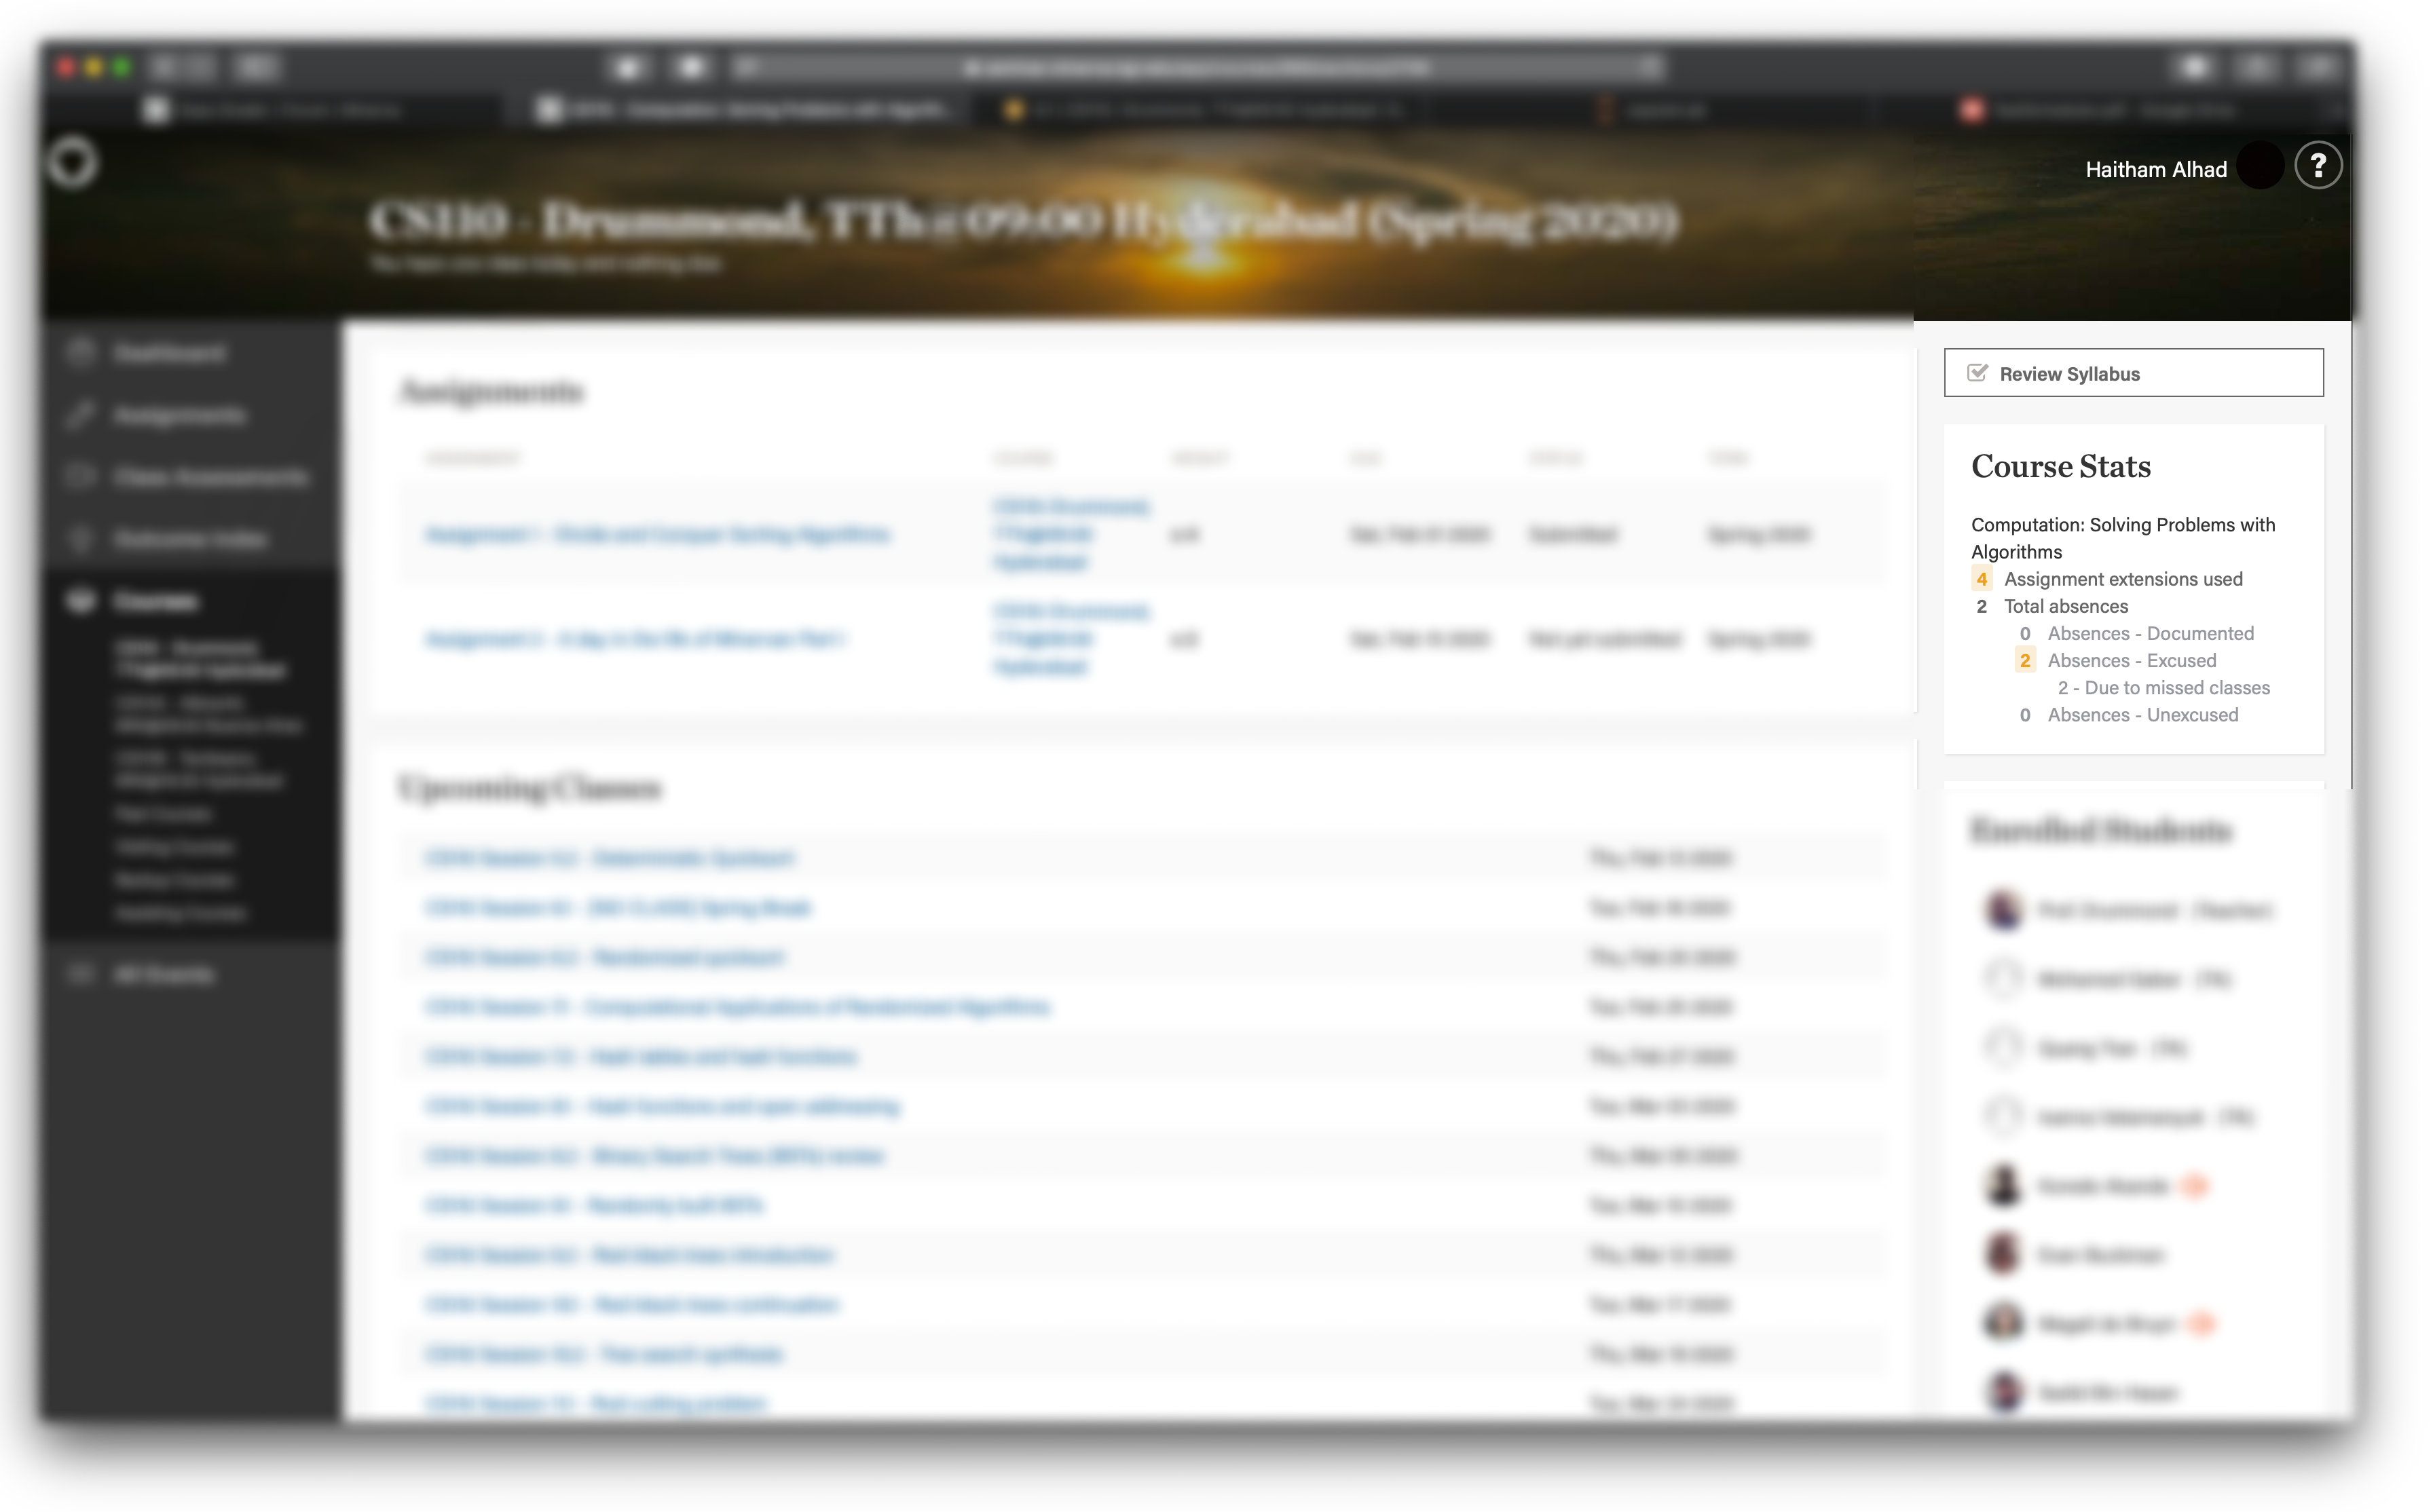

In [2]:
from IPython.display import Image
Image(filename='./images/my_dashboard_feb13.png')

## Part B [#ComputationalSolutions, #DataStructures]

Prepare a table containing a list of all the activities that you plan to do in the city of your rotation, with a short, compelling justification why they are interesting. Make sure you plan activities that involve visiting landmarks or other locations that highlight particular socio-culture aspects of the rotation city where you are. An activity is decomposed in a set of tasks which are exclusively of a cultural nature (not routine nor academic). Your assignment needs to include:
* At least 5 activities and each activity can be subdivided into 3 to k tasks.
* 3 of the activities must be culturally specific to your rotation city.  Make sure to include at least 1 picture per activity.

For example, if you want to visit the Neues Museum, this will be one of the tasks satisfying these requirements. Reasonable subtasks will include: checking the timetable for the museum exhibitions on its webpage, take the bus/tram from the residence hall to the museum, enjoy an exhibition, have lunch in the cafeteria, visit the souvenir’s shop, take the bus/tram back home.

How will you store information about these activities and sub-tasks?



<table>
    <thead>
        <tr>
            <th colspan=3>Activities to carry out in Hyderabad</th>
        </tr>
        <tr>
            <th></th>
            <th> Activity </th>
            <th> Task </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=5>
                <img src="images/charminar.jpeg" width=75px>
            </td>
            <td rowspan=5>Charminar</td>
            <td> Invite friends</td>
        </tr>
        <tr>
            <td> Book an auto </td>
        </tr>
        <tr>
            <td> Commute to the charminar </td>
        </tr>
        <tr>
            <td> Take photos </td>
        </tr>
        <tr>
            <td> Have Iranian chai at the cafe beside charminar </td>
        </tr>
        <tr>
            <td rowspan=4>
                <img src="images/agra.gif" width=75px>
            </td>
            <td rowspan=4>Agra</td>
            <td> Book travel </td>
        </tr>
        <tr>
            <td> Book stays </td>
        </tr>
        <tr>
            <td> Buy entrance tickets </td>
        </tr>
        <tr>
            <td> Take photos </td>
        </tr>
        <tr>
            <td rowspan=3>
                <img src="images/assignments.png" width=75px>
            </td>
            <td rowspan=3>Assignments</td>
            <td> Identify all the assignments due soon </td>
        </tr>
        <tr>
            <td> Plan for a time to do each in the calendar </td>
        </tr>
        <tr>
            <td> Complete the assignments </td>
        </tr>
        <tr>
            <td rowspan=4>
                <img src="images/masjid.jpeg" width=75px>
                <sup>1</sup>
            </td>
            <td rowspan=4>Masjid</td>
            <td> Take a shower </td>
        </tr>
        <tr>
            <td> Commute to Mecca Masjid </td>
        </tr>
        <tr>
            <td> Have jumaah </td>
        </tr>
        <tr>
            <td> Have lunch </td>
        </tr>
        <tr>
            <td rowspan=5>
                <img src="./images/jaisalmer.jpg" width=75px>
                <sup>2</sup>
            </td>
            <td rowspan=5>Jaisalmer</td>
            <td> Pick a date </td>
        </tr>
        <tr>
            <td> Book the commute </td>
        </tr>
        <tr>
            <td> Pick a book to read </td>
        </tr>
        <tr>
            <td> Pack belongings </td>
        </tr>
        <tr>
            <td> Fill the Minerva woofu form </td>
        </tr>
    </tbody>
</table>

----

<sup>1</sup> The image was obtained from the a google static [image link](https://t0.gstatic.com/images?q=tbn:ANd9GcTylHJobrb6webHZXbxWAGt3xlC_6BeRtlng15KWhj-VDBGh-2sX71Kf9FEpbsdgVPD5QUPZVnJfuF-XQ) as part of [things to do in Hyderabad](https://www.google.com/travel/things-to-do/see-all?g2lb=2502548%2C4254308%2C4258168%2C4260007%2C4270442%2C4274032%2C4291318%2C4305595%2C4306835%2C4308216%2C4308984%2C4314846%2C4317915%2C4328159%2C4329288%2C4330113%2C4338438%2C4353691%2C4270859%2C4284970%2C4291517%2C4292955%2C4316256&hl=en&gl=in&un=1&otf=1&dest_mid=%2Fm%2F09c6w&dest_state_type=sattd&dest_src=ts&sa=X&ved=2ahUKEwj_94rL8c7nAhVKfisKHQB8ARwQ69EBKAEwAHoECA4QBQ#ttdm=17.352867_78.404902_11&ttdmf=%252Fm%252F07tpqm).

<sup>2</sup> The image was obtained from a wikipedia [image file](https://en.wikipedia.org/wiki/Jaisalmer#/media/File:JaisalmerFort.jpg) as part of the [wikipedia page](https://en.wikipedia.org/wiki/Jaisalmer) about Jaisalmer.

In [3]:
from collections import namedtuple
from typing import List

Status = namedtuple('status', ('NOT_YET_STARTED', 'IN_PROGRESS', 'COMPLETED'))
status = Status(-1, 0, 1)


class Task:
    """
    A class used to represent a task

    Attributes:
        description:
            The description of the task

    Methods:
        is_complete:
            Checks if the task is completed
        is_in_progress:
            Checks if the task is still in progress
    """

    __id_generator = (x for x in range(1, 99999999, 1))
    """It produces a new id for each instantiation of the Task class"""

    __tasks = []
    """A list that contains all the tasks instantiated by the class"""

    def __init__(self, minutes: float, description: str, activity=None, *dependencies) -> None:
        self.__id: int = Task.__id_generator.__next__()
        self.description: str = description
        self.__activity = None
        # Initialise activity as None
        # then update it
        self.activity = activity  # :type Activity
        self.__original_duration: float = minutes
        self.__duration: float = minutes
        self.__dependencies: dict = {}
        if not len(dependencies) == 0:
            self.add_dependency(*dependencies)
        self.__dependants: dict = {}
        Task.__tasks.append(self)

    @property
    def id(self) -> int:
        """The unique identifier of the given task"""
        return self.__id

    @id.setter
    def id(self, new_id: int) -> None:
        raise TypeError("'id' does not support assignment")

    @property
    def activity(self):
        """The activity associated with the current task"""
        return self.__activity

    @activity.setter
    def activity(self, activity):
        if self.__activity:
            self.__activity.remove_tasks(self)
        self.__activity = activity
        if activity:
            activity.add_tasks(self)

    @property
    def original_duration(self) -> float:
        """The original duration set for the given task"""
        return self.__original_duration

    @original_duration.setter
    def original_duration(self, new_duration: float) -> None:
        raise TypeError("'original_duration' does not support assignment")

    @property
    def duration(self) -> float:
        """The remaining amount of time to complete the given task"""
        return self.__duration

    @duration.setter
    def duration(self, value: float) -> None:
        raise TypeError("'duration' cannot be updated directly")

    @property
    def status(self) -> int:
        """The status of the task if it has not yet started, is in progress or is completed"""
        self.__update_status()
        return self.__status

    @status.setter
    def status(self, value) -> None:
        raise TypeError("'status' does not support assignment")

    @property
    def dependencies(self) -> List:
        """The tasks that the current task depends on"""
        return list(self.__dependencies.values())

    @dependencies.setter
    def dependencies(self, value) -> None:
        raise TypeError("'dependencies' cannot be updated directly")

    @property
    def dependants(self) -> List:
        """The tasks that depend on the current task"""
        return list(self.__dependants.values())

    @dependants.setter
    def dependants(self, value) -> None:
        raise TypeError("'dependants' cannot be updated directly")

    def add_dependency(self, *tasks) -> None:
        """
        Add task(s) that the current task depends on

        :param tasks:
            The task(s) to add as dependencies
        """
        for task in tasks:
            if not task.is_complete():
                self.__dependencies[task.id] = task
                task.__add_dependant(self)

    def remove_dependency(self, *tasks) -> None:
        """
        Removes task(s) that the current task depends on

        :param tasks:
            The task(s) to remove as dependencies
        """

        for task in tasks:
            self.__dependencies.pop(task.id)
            task.__remove_dependant(self)

    def __add_dependant(self, *tasks) -> None:
        """
        Adds task(s) that depends on the current task

        :param tasks:
            The task(s) that will have the current task as a dependency
        """
        for task in tasks:
            self.__dependants[task.id] = task

    def __remove_dependant(self, *tasks) -> None:
        """
        Removes task(s) that depend on the current task

        :param tasks:
            The task(s) that already have the current task as a dependency
        """
        for task in tasks:
            self.__dependants.pop(task.id)

    def complete(self, minutes: float) -> None:
        """
        Reduces the remaining duration

        :param minutes:
            The number of minutes to complete within the task
        """
        self.__duration -= minutes
        self.__update_status()

    def is_complete(self) -> bool:
        return self.status == status.COMPLETED

    def is_in_progress(self) -> bool:
        return self.status == status.IN_PROGRESS

    def __update_status(self) -> None:
        """Updates the status of the given task based on the duration remaining"""
        if self.duration <= 0:
            self.__status = status.COMPLETED
            self.__duration = 0
            self.__clear_dependants()
        elif self.duration == self.original_duration:
            self.__status = status.NOT_YET_STARTED
        else:
            self.__status = status.IN_PROGRESS

    def __clear_dependants(self) -> None:
        """Removes the current task as a dependency in all the tasks that depend on it"""
        for task in self.__dependants.copy().values():
            if task.id in self.__dependants:
                task.remove_dependency(self)

    def reset_activity(self):
        """Resets the activity associated with the task"""
        self.__activity = None

    @classmethod
    def all_tasks(cls) -> List:
        """
        Produces all the objects instantiated by the class
        :return:
            All the tasks
        """
        return cls.__tasks

    @classmethod
    def reset(cls) -> None:
        """Deletes all the tasks that have ever been instantiated"""
        for task in cls.all_tasks():
            del task
        cls.__tasks = []
        cls.__id_generator = (x for x in range(1, 99999999, 1))

    def __str__(self) -> str:
        return f"Task: {self.id} - {self.description}, remaining time: {self.duration} minutes"

    def __gt__(self, other) -> bool:
        if isinstance(other, Task):
            return self.duration > other.duration
        return self.duration > other

    def __lt__(self, other) -> bool:
        if isinstance(other, Task):
            return self.duration < other.duration
        return self.duration < other


In [4]:
import unittest


class TestTask(unittest.TestCase):

    def setUp(self):
        self.task_1: Task = Task(10, "Eat bubble gum")
        self.task_2: Task = Task(15, "Eat candy")
        self.task_3: Task = Task(10, "Eat chocolate")

    def tearDown(self) -> None:
        Task.reset()

    def test_task_creation(self):
        self.assertTrue(
            self.task_1.id != self.task_2.id,
            "Each task must have a unique id"
        )
        self.assertEqual(
            self.task_1.original_duration, 10,
            "The original duration must equal that passed in instantiation"
        )
        self.assertEqual(
            self.task_1.duration, 10,
            "Remaining duration should equal duration"
        )
        self.assertEqual(
            self.task_1.description,
            "Eat bubble gum",
            "Description should be equal to that in instantiation"
        )

    def test_id(self):
        def adjust_id(task: Task, new_id: int):
            task.id = new_id

        self.assertRaises(TypeError, adjust_id, self.task_1, 5)

    def test_duration(self):
        def adjust_original_duration(task: Task, new_duration: float):
            task.original_duration = new_duration

        self.assertRaises(
            TypeError, adjust_original_duration, self.task_1, 100)

        def adjust_duration(task: Task, new_duration: float):
            task.duration = new_duration

        self.assertRaises(
            TypeError, adjust_duration, self.task_1, 100)

    def test_status(self):
        self.assertEqual(
            self.task_1.status, status.NOT_YET_STARTED,
            "The task should have not yet started")
        self.task_1.complete(2)
        self.assertTrue(
            self.task_1.is_in_progress(),
            "The task should be in progress after a certain amount of its duration has been completed"
        )
        self.task_1.complete(10)
        self.assertTrue(
            self.task_1.is_complete() and self.task_1.duration == 0,
            "The task should be completed now and its remaining duration equal to 0"
        )

        def adjust_status(task: Task, new_status: int):
            task.status = new_status

        self.assertRaises(
            TypeError, adjust_status, self.task_1, status.NOT_YET_STARTED)

    def test_comparisons(self):
        self.assertTrue(
            self.task_2 > self.task_1,
            f"Task 2 should be greater than task 3; task_2 {self.task_2.duration}, {self.task_3.duration}"
        )
        self.task_2.complete(7)
        self.assertTrue(
            self.task_3 > self.task_2,
            f"Task 3 should be greater than task 2; ; task_2 {self.task_2.duration}, {self.task_3.duration}"
        )
        self.assertTrue(
            self.task_2 < self.task_3,
            f"Task 2 should be less than task 3; ; task_2 {self.task_2.duration}, {self.task_3.duration}"
        )

    def test_dependencies(self):
        def adjust_dependency(task: Task):
            task.dependencies = {}

        self.assertRaises(
            TypeError, adjust_dependency, self.task_1)

        self.task_1.add_dependency(self.task_2, self.task_3)
        self.assertEqual(
            len(self.task_1.dependencies),
            2,
            "Task 1 should have 2 dependencies"
        )

        def adjust_dependants(task: Task):
            task.dependants = {}

        self.assertRaises(
            TypeError, adjust_dependants, self.task_1)

        self.assertTrue(
            len(self.task_2.dependants) == 1 and len(
                self.task_3.dependants) == 1,
            "Both task 2 and 3 have 1 task that depend on them"
        )

        self.task_2.complete(20)
        self.assertTrue(
            len(self.task_1.dependencies) == 1 and len(
                self.task_2.dependants) == 0,
            "Task 1 should have 1 dependency remaining and task 2 should have no dependants"
        )

        self.task_3.add_dependency(self.task_2)
        self.assertTrue(
            len(self.task_3.dependencies) == 0 and self.task_3.id not in self.task_2.dependants,
            "Since we completed task 2, we shouldn't be able to add it as a dependency"
        )

    def test_all_tasks(self):
        self.assertTrue(
            # The count of all tasks should be equal to the id of the last task instantiated
            len(Task.all_tasks()) == self.task_3.id
        )

    def test_reset(self):
        Task.reset()
        self.assertTrue(
            len(Task.all_tasks()) == 0,
            "All the tasks must be deleted and cleaned out"
        )
        task = Task(1, "Eat java beans")
        self.assertTrue(
            len(Task.all_tasks()) == 1 and task.id == 1,
            "Ensure that after a reset id's begin from the 1st one"
        )


In [5]:
tests = TestTask()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

........
----------------------------------------------------------------------
Ran 8 tests in 0.017s

OK


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

In [6]:
class Activity:
    """
    A class representing an activity that contains tasks
    """

    def __init__(self, name: str, *tasks: Task) -> None:
        self.__name: str = name
        self.__tasks: dict = {}
        if not len(tasks) == 0:
            self.add_tasks(*tasks)

    @property
    def name(self) -> str:
        """The name of the activity"""
        return self.__name

    @name.setter
    def name(self, value: str) -> None:
        self.__name = value

    @property
    def tasks(self) -> List[Task]:
        """The tasks that are associated with the current activity"""
        return list(self.__tasks.values())

    @tasks.setter
    def tasks(self, value):
        raise TypeError("'tasks' cannot be updated directly")

    def add_tasks(self, *tasks) -> None:
        """
        Adds tasks to the activity

        :param tasks: Task
            The task(s) to add
        """
        for task in tasks:
            if task.id not in self.__tasks:
                self.__tasks[task.id] = task
                if task.activity != self: task.activity = self

    def remove_tasks(self, *tasks) -> None:
        """
        Removes tasks already in the current activity
        :param tasks:
            The tasks to remove the association with the current activity
        """
        for task in tasks:
            if task.id in self.__tasks:
                self.__tasks.pop(task.id)
                task.reset_activity()


In [7]:
class TestActivity(unittest.TestCase):

    def setUp(self) -> None:
        self.task_1 = Task(10, "Talking")
        self.task_2 = Task(10, "Writing")
        self.activity_1 = Activity("Meeting", self.task_1, self.task_2)
        self.activity_2 = Activity("Exercise")

    def tearDown(self):
        Task.reset()

    def test_instantiation(self):
        self.assertTrue(
            self.activity_1.name == "Meeting",
            "The name of the activity should match that it was instantiated with"
        )
        self.assertTrue(
            len(self.activity_1.tasks) == 2,
            "The activity should contain two tasks that it was instantiated with"
        )
        new_act = Activity("New")
        self.assertTrue(
            len(new_act.tasks) == 0,
            "A new activity with no task parameters should have no tasks"
        )

    def test_update_name(self):
        self.activity_1.name = "Exercise"
        self.assertTrue(
            self.activity_1.name == "Exercise",
            "The name of the activity should match that it got updated to"
        )

    def test_tasks(self):
        def adjust_tasks(activity: Task):
            activity.tasks = {}

        self.assertRaises(
            TypeError, adjust_tasks, self.activity_1)

    def test_associate_tasks(self):
        self.assertTrue(
            self.activity_1 == self.task_1.activity,
            "Activity 1 should be similar to the activity in task 1"
        )
        self.assertTrue(
            len(self.activity_2.tasks) == 0,
            "Activity should not have any tasks"
        )
        self.activity_2.add_tasks(self.task_2)
        self.assertTrue(
            len(self.activity_2.tasks) == 1,
            "Activity 2 should have 1 activity now"
        )
        self.assertTrue(
            self.task_2.activity == self.activity_2,
            "Task 2 should have activity 2 as its activity"
        )
        self.assertTrue(
            len(self.activity_1.tasks) == 1,
            "Activity 1 should now have 1 task"
        )

        task_3 = Task(5, "Eat cabbage", self.activity_1)
        self.assertTrue(
            task_3.activity == self.activity_1,
            "Task 3 should have its activity set to activity 1"
        )

        self.assertTrue(
            len(self.activity_1.tasks) == 2,
            "Activity 1 should now have 2 tasks"
        )

In [8]:
tests = TestActivity()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [9]:
charminar = Activity("Charminar", Task(50, "Invite friends"))
auto = Task(10, "Book an auto", charminar)
commute = Task(120, "Commute to charminar", charminar, auto)
c_photos = Task(27, "Take photos", charminar, commute)
tea = Task(16, "Have Iranian chai at the cafe beside charminar", charminar, commute)

In [10]:
agra = Activity("Agra", Task(25, "Book travel"), Task(24, "Book stays"), Task(8, "Buy entrance tickets"))

a_photos = Task(360, "Take photos", agra, *agra.tasks)

In [11]:
assignments = Activity("Assignments", Task(20, "Identify all assignments due soon"))
plan = Task(30, "Plan for a time to do each in the calendar", assignments, *assignments.tasks)
complete = Task(700, "Complete the assignments", assignments, *assignments.tasks)

In [12]:
masjid = Activity("Masjid", Task(34, "Take a shower"))
m_commute = Task(135, "Commute to Mecca Masjid", masjid, *masjid.tasks)
jumaah = Task(70, "Have jumaah", masjid, *masjid.tasks)
lunch = Task(100, "Have lunch", masjid, *masjid.tasks)

In [13]:
jaisalmer = Activity("Jaisalmer", Task(21, "Pick a date"))
j_commute = Task(33, "Book a commute", jaisalmer, *jaisalmer.tasks)
jaisalmer.add_tasks(Task(7, "Pick a book to read"))
Task(34, "Pack belongings", jaisalmer, *jaisalmer.tasks)
Task(5, "Fill the Minerva woofu form", jaisalmer)

In [14]:
class TestActivities(unittest.TestCase):

    def test_task_dependencies(self):
        self.assertTrue(
            len(commute.dependencies) == 1,
            "Ensure commute has 1 task that it depends on"
        )

        self.assertTrue(
            len(commute.dependants) == 2,
            "Ensure commute has 2 tasks that depend on it"
        )

    def test_charminar_tasks(self):
        self.assertTrue(
            auto in charminar.tasks,
            "The auto task must be a task in charminar's activity"
        )

        self.assertTrue(
            commute in charminar.tasks,
            "The commute task must be a task in charminar's activity"
        )

        self.assertTrue(
            c_photos in charminar.tasks,
            "The c_photos task must be a task in charminar's activity"
        )

        self.assertTrue(
            tea in charminar.tasks,
            "The tea task must be a task in charminar's activity"
        )

        self.assertTrue(
            len(charminar.tasks) == 5,
            "charminar activity should have 5 tasks"
        )

    def test_count_tasks(self):
        self.assertTrue(
            len(agra.tasks) == 4,
            "Ensure agra activities have been added correctly"
        )
        self.assertTrue(
            len(assignments.tasks) == 3,
            "Ensure assignments activities have been added correctly"
        ) 
        self.assertTrue(
            len(masjid.tasks) == 4,
            "Ensure masjid activities have been added correctly"
        )
        self.assertTrue(
            len(jaisalmer.tasks) == 5,
            "Ensure jaisalmer activities have been added correctly"
        )
        self.assertTrue(
            len(Task.all_tasks()) == 21,
            "Ensure all the tasks have been added correctly"
        )

In [15]:
tests = TestActivities()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Part C [#PythonProgramming, #CodeReadability]

Write a Task Priority Scheduler in Python 3, which receives the list of tasks above as input and returns a day task schedule for you to follow. Please refrain from using any external Python library besides the math and random module (if you intend on using other libraries, please check with your course instructor first).  

**Your Computational Solution to the Task Scheduler.**

You can organize your list of tasks using Python lists as we studied in one of lesson 4.1 activities. Of course, you may choose to make an improvement and choose to implement the list of tasks using a different Python data type (e.g. Python dictionaries, classes, NumPy arrays,  etc). In all cases, make sure your internal representation of the list of tasks has all the fields described in Figure 1.  Your implementation of the task scheduler must report at the end of every time-step which task is being performed and the remaining time for that task.  Additionally, your scheduler must report every time a task is completed.  The scheduler ends when all tasks have been completed.

**Input:** list of tasks, current time for the scheduler (in minutes), time-step (in minutes).

**Output:** periodic reports of the current task being executed (every time-step), report of task completions, report whenever the scheduler has completed all tasks.

Below you are given an example of what the input and output may look like, taken from the activity in lesson 4.1. Note that this is only an example and you can improve the formatting and presentation of the output, as long as it meets all the requirements for the output above.

Example code:
```python
tasks = [[0, 'get up at 8:00 AM', 10, [],], 
         [1, 'get dressed and ready', 15, [0]],
         [2, 'eat healthy breakfast',40, [0]]
        ]
my_scheduler(tasks, step_size, init_time)
print("Completed all planned tasks")
```

Example output:
```
Simple Scheduler at time: 8h0 executing task:0 remaining time10
Completed Task:0 - get up at 8:00 AM
Simple Scheduler at time: 8h10 executing task:1 remaining time15
Simple Scheduler at time: 8h20 executing task:1 remaining time5
Completed Task:1 - get dressed and ready
Simple Scheduler at time: 8h25 executing task:2 remaining time40
Simple Scheduler at time: 8h35 executing task:2 remaining time30
Simple Scheduler at time: 8h45 executing task:2 remaining time20
Simple Scheduler at time: 8h55 executing task:2 remaining time10
Completed Task:2 - eat healthy breakfast
Completed all planned tasks
```


In [16]:
from typing import List


class MaxHeapq:
    """
    This class implements properties and methods that support a max priority queue data structure

    Attributes:
        heap: key values in the max heap are stored here
        heap_size: An integer counter of the number of keys present in the max heap

    Example:
        Class initialization:
            heapq_var = MaxHeapq()
    """

    def __init__(self):
        self.heap: List = []
        self.heap_size: int = 0

    def max_key(self):
        """Gets the highest key in the priority queue"""
        return self.heap[0]

    def heappush(self, key):
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size, key)
        self.heap_size += 1

    def increase_key(self, i, key):
        """
        This method implements the INCREASE_KEY operation, which modifies the value of a key
        in the max priority queue with a higher value.
        """
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[MaxHeapq.parent(i)] < self.heap[i]:
            j = MaxHeapq.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j

    def heapify(self, i: int) -> None:
        """
        This method implements the MAX_HEAPIFY operation for the max priority queue.
        :param i: The array index of the root node of the subtree to heapify
        """
        l = MaxHeapq.left(i)
        r = MaxHeapq.right(i)
        heap = self.heap
        if l <= (self.heap_size - 1) and heap[l] > heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size - 1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        This method implements the EXTRACT_MAX operation. It returns the largest key in
        the max priority queue and removes this key from the max priority queue.
        :return: the largest key
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        max_key = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1
        self.heapify(0)
        return max_key

    @staticmethod
    def left(i: int) -> int:
        """
        Takes as input the array index of a parent node in the binary tree and
        returns the array index of its left child.
        :param i: Current node's index
        :return: Left child index
        """
        return 2 * i + 1

    @staticmethod
    def right(i: int) -> int:
        """
        Takes as input the array index of a parent node in the binary tree and
        returns the array index of its right child.
        :param i: Current node's index
        :return: right child index
        """
        return 2 * i + 2 

    @staticmethod
    def parent(i):
        """
        Takes as input the array index of a node in the binary tree and returns the array index of its parent
        :param i: Current node's index
        :return: Parent index
        """
        return (i - 1) // 2

In [17]:
class TestQueues(unittest.TestCase):

    def test_heapify(self):
        A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
        my_heap = MaxHeapq()

        for key in A:
            my_heap.heappush(key)

        for i, key in enumerate(my_heap.heap):
            if i != 0:
                self.assertTrue(
                    key <= my_heap.heap[my_heap.parent(i)]
                )

In [18]:
tests = TestQueues()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [19]:
import datetime

def update_queue(heap: MaxHeapq, tasks):
    """Updates the priority queue to update for changes that occurred"""

    for task in tasks:
        if task.is_complete() and task in heap.heap:
            heap.heap.remove(task)
            heap.heap_size -= 1
        elif not task.is_complete() and len(task.dependencies) == 0 and task not in heap.heap:
            heap.heappush(task)


def my_scheduler(tasks: List, step_size: float, init_time: datetime.datetime):
    """ Feel free to add helper functions or other code above this function if you want to.
    Input: 
    - tasks: a Python list of tasks. How each individual task is stored/ presented depends on your 
    answer to Part B.
    - step_size: int, step size in minutes
    - init_time: int, initial time, set in minutes (8AM = 480)
    """
    my_heap = MaxHeapq()
    current_time = init_time

    update_queue(my_heap, tasks)

    while my_heap.heap:
        next_task: Task = my_heap.heappop()
        while not next_task.is_complete():
            print("Simple Scheduler at time:", current_time, "executing:", next_task)
            next_task.complete(step_size)
            current_time += datetime.timedelta(minutes = step_size)
        print("Completed", next_task, "at", current_time)
        update_queue(my_heap, tasks)
    print("Completed all planned tasks")

In [20]:
my_scheduler(Task.all_tasks(), 10, datetime.datetime.now())

682 executing: Task: 6 - Book travel, remaining time: 25 minutes
Simple Scheduler at time: 2020-02-15 21:42:20.128682 executing: Task: 6 - Book travel, remaining time: 15 minutes
Simple Scheduler at time: 2020-02-15 21:52:20.128682 executing: Task: 6 - Book travel, remaining time: 5 minutes
Completed Task: 6 - Book travel, remaining time: 0 minutes at 2020-02-15 22:02:20.128682
Simple Scheduler at time: 2020-02-15 22:02:20.128682 executing: Task: 7 - Book stays, remaining time: 24 minutes
Simple Scheduler at time: 2020-02-15 22:12:20.128682 executing: Task: 7 - Book stays, remaining time: 14 minutes
Simple Scheduler at time: 2020-02-15 22:22:20.128682 executing: Task: 7 - Book stays, remaining time: 4 minutes
Completed Task: 7 - Book stays, remaining time: 0 minutes at 2020-02-15 22:32:20.128682
Simple Scheduler at time: 2020-02-15 22:32:20.128682 executing: Task: 17 - Pick a date, remaining time: 21 minutes
Simple Scheduler at time: 2020-02-15 22:42:20.128682 executing: Task: 17 - Pic

In [21]:
# Confirm that all tasks are done
for task in Task.all_tasks():
    print(task)

Task: 1 - Invite friends, remaining time: 0 minutes
Task: 2 - Book an auto, remaining time: 0 minutes
Task: 3 - Commute to charminar, remaining time: 0 minutes
Task: 4 - Take photos, remaining time: 0 minutes
Task: 5 - Have Iranian chai at the cafe beside charminar, remaining time: 0 minutes
Task: 6 - Book travel, remaining time: 0 minutes
Task: 7 - Book stays, remaining time: 0 minutes
Task: 8 - Buy entrance tickets, remaining time: 0 minutes
Task: 9 - Take photos, remaining time: 0 minutes
Task: 10 - Identify all assignments due soon, remaining time: 0 minutes
Task: 11 - Plan for a time to do each in the calendar, remaining time: 0 minutes
Task: 12 - Complete the assignments, remaining time: 0 minutes
Task: 13 - Take a shower, remaining time: 0 minutes
Task: 14 - Commute to Mecca Masjid, remaining time: 0 minutes
Task: 15 - Have jumaah, remaining time: 0 minutes
Task: 16 - Have lunch, remaining time: 0 minutes
Task: 17 - Pick a date, remaining time: 0 minutes
Task: 18 - Book a commut

## Part D [#ComputationalSolutions]
Now, you realize that some of the tasks in your schedule can be multitasked! This is, many of your daily tasks can be performed simultaneously (e.g. sipping a local beverage while chatting with a friend at a cafe, taking pictures while riding a bus or walking in a park). In this section, you need to review your computational solution to the task scheduler, and now include the handling of multitasking. Notice that while some tasks can be multitasked, others cannot because they require your full attention (e.g. CS110 pre-class work).

This revised version of the scheduler receives a list of tasks in a table of the form shown below:

<h5><center> Task_ID | Task Description | Task Duration | List of Task Dependencies | Multitasking | Task Status</center></h5>

Part D does not require any code but you will be asked to provide a Python implementation in Part E.

* **Multitasking.** It is a boolean field (True/False) determining whether a task can be multitasked.

* **Criteria for scheduling Non-Multitasking tasks.** These tasks require your full attention, therefore your scheduler cannot schedule any other tasks while a non-multitasking task has not been completed. After completion of a non-multitasking task, make sure to update the dependencies of any other tasks (where appropriate) and the corresponding priorities.


* **Criteria for scheduling Multitasking tasks.** These tasks can share the time you dedicate to them. Notice that when multitasking, the tasks may have a different duration time,  and you will need to keep track of the remaining time for every task being processed in multitasking mode and update the scheduler clock accordingly.   In fact, when two or more multitasking tasks are being executed, the remaining time of every task needs to be adjusted at the same time. Notice that because multitasking tasks have different duration times, they will be completed at different times.

    *Hint*: You may wonder how to prevent two multitasking tasks that are not compatible with happening at the same time. For example, eat a delicious pizza and brushing your teeth. These two tasks can be performed in multitasking but they don’t make sense together. Let’s say that you decide to eat your pizza and then brush your teeth but not the other way around, in this case you may want to use the concept of dependencies to establish an order.

Describe any changes you will need to make to the first version of the scheduler. You are asked to implement this schedule in Python in the next section.


The changes that need to be implemented are extending the `Task` class from above to be a new `Multitasking` class. The previous implementation of adjusting `durations` and `dependencies` would be maintained. The main addition would be the capability of _multitasking_ represented by an attribute in the class.

The other change would occur in the task execution code whereby we will have to execute all multitaking tasks at the smae time.

The [#constraints](http://seminar.minerva.kgi.edu/app/outcome-index/hcs/constraints) that I intend to place are that only tasks from the same activity can be multitasked together.

<table>
    <thead>
        <tr>
            <th colspan=4>Updated Activities to carry out in Hyderabad</th>
        </tr>
        <tr>
            <th> Activity </th>
            <th> Task </th>
            <th> Can Multitask </th>
            <th> Dependencies </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=5>Charminar</td>
            <td> Invite friends</td>
            <td> ✅ </td>
            <td></td>
        </tr>
        <tr>
            <td> Book an auto </td>
            <td> ✅ </td>
            <td></td>
        </tr>
        <tr>
            <td> Commute to the charminar </td>
            <td> ✅ </td>
            <td> Book an auto </td>
        </tr>
        <tr>
            <td> Take photos </td>
            <td> ✅ </td>
            <td> Commute to the charminar </td>
        </tr>
        <tr>
            <td> Have Iranian chai at the cafe beside charminar </td>
            <td> ✅ </td>
            <td> Commute to the charminar </td>
        </tr>
        <tr>
            <td rowspan=4>Agra</td>
            <td> Book travel </td>
            <td> ✅ </td>
            <td> </td>
        </tr>
        <tr>
            <td> Book stays </td>
            <td> ✅ </td>
            <td> </td>
        </tr>
        <tr>
            <td> Buy entrance tickets </td>
            <td> ✅ </td>
            <td> Book travel, Book stays </td>
        </tr>
        <tr>
            <td> Take photos </td>
            <td> ❌ </td>
            <td> Buy entrance tickets </td>
        </tr>
        <tr>
            <td rowspan=3>Assignments</td>
            <td> Identify all the assignments due soon </td>
            <td> ❌ </td>
            <td> </td>
        </tr>
        <tr>
            <td> Plan for a time to do each in the calendar </td>
            <td> ❌ </td>
            <td> Identify all the assignments due soon </td>
        </tr>
        <tr>
            <td> Complete the assignments </td>
            <td> ❌ </td>
            <td> Plan for a time to do each in the calendar </td>
        </tr>
        <tr>
            <td rowspan=4>Masjid</td>
            <td> Take a shower </td>
            <td> ❌ </td>
        </tr>
        <tr>
            <td> Commute to Mecca Masjid </td>
            <td> ❌ </td>
            <td> Take a shower </td>
        </tr>
        <tr>
            <td> Have jumaah </td>
            <td> ❌ </td>
            <td> Commute to Mecca Masjid <td>
        </tr>
        <tr>
            <td> Have lunch </td>
            <td> ✅ </td>
            <td> Commute to Mecca Masjid </td>
        </tr>
        <tr>
            <td rowspan=5>Jaisalmer</td>
            <td> Pick a date </td>
        </tr>
        <tr>
            <td> Book the commute </td>
        </tr>
        <tr>
            <td> Pick a book to read </td>
        </tr>
        <tr>
            <td> Pack belongings </td>
        </tr>
        <tr>
            <td> Fill the Minerva woofu form </td>
        </tr>
    </tbody>
</table>


## Part E [#PythonProgramming, #CodeReadability]

Write a Task Priority Scheduler with Multitasking capability in Python 3, which receives as input a list of tasks as depicted in Figure 2, and reports (output) at the end of every time-step which task is being performed and the remaining time for that task.  Additionally, your scheduler must report every time a task is completed. Please refrain from using any external Python library besides the math and random module (if you intend on using other libraries, please check with your course instructor first).  

**Input:** list of tasks, current time for the scheduler (in minutes), time-step (in minutes).
**Output:** periodic reports of the current task(s) being executed (every time-step), report of  task completions, report whenever the scheduler has completed all tasks. 

See example code for the input and output in Part C


In [ ]:
def my_multitask_scheduler(tasks, step_size, init_time):
    """ Feel free to add helper functions or other code above this function if you want to.
    Input: 
    - tasks: a Python list of tasks. How each individual task is stored/ presented depends on your 
    answer to Part B.
    - step_size: int, step size in minutes
    - init_time: int, initial time, set in minutes (8AM = 480)
    """
    # YOUR CODE HERE
    raise NotImplementedError()

## Part F [#ComputationalCritique]
Produce a critical analysis of your scheduler, highlighting all the benefits in following the algorithmic directives defined in the instructions and any failure modes you envision it running into. 



YOUR ANSWER HERE